# Time Series Overview - General
> Time series = Trend + [Seasonality] + [cyclic] + [Noise] + [Change point]
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

## 1. Basic Concept

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

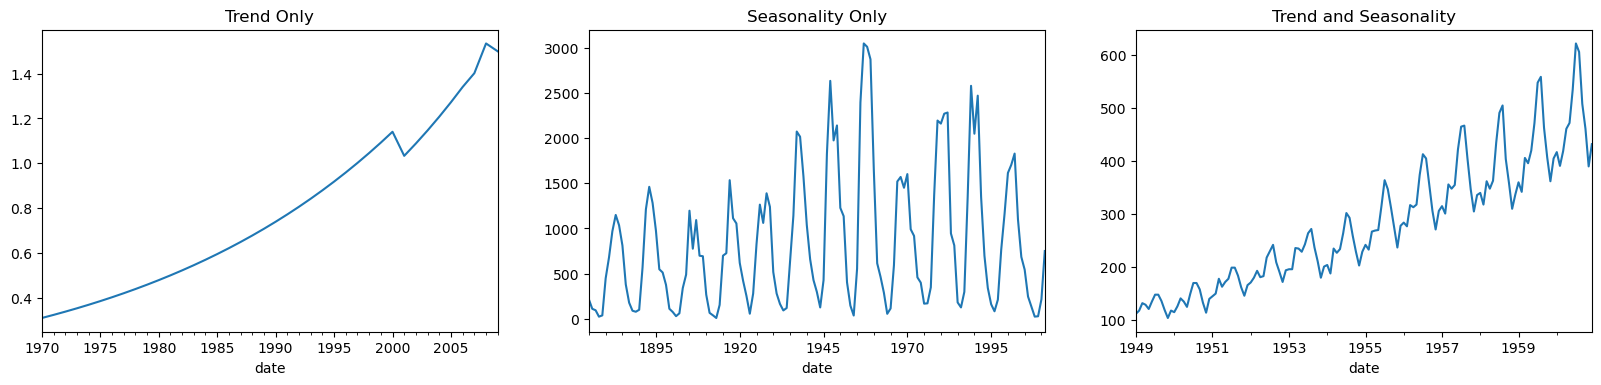

In [53]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv',
            parse_dates=['date'],
            index_col='date')\
    .plot(title='Trend Only',
          legend=False,
          ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv',
            parse_dates=['date'],
            index_col='date')\
    .plot(title='Seasonality Only',
          legend=False,
          ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv',
            parse_dates=['date'],
            index_col='date')\
    .plot(title='Trend and Seasonality',
          legend=False,
          ax=axes[2])

* Additive TS: Trend + [Seasonality|cyclic] + [Noise]
* Multiplicative TS: Trend x [Seasonality|cyclic] x [Noise]

## 2. Decompose Time Series

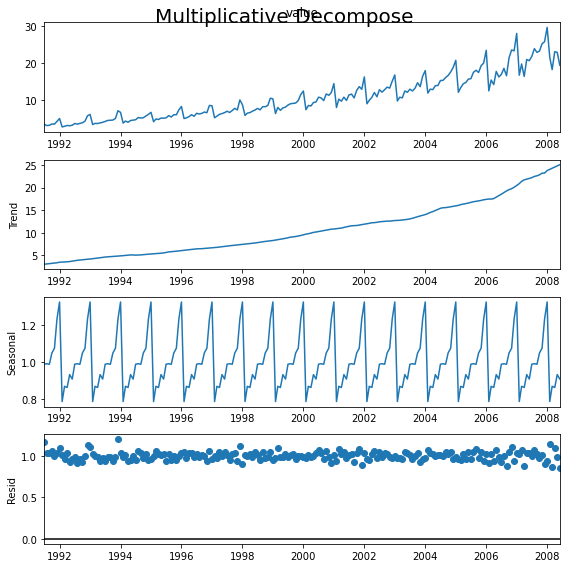

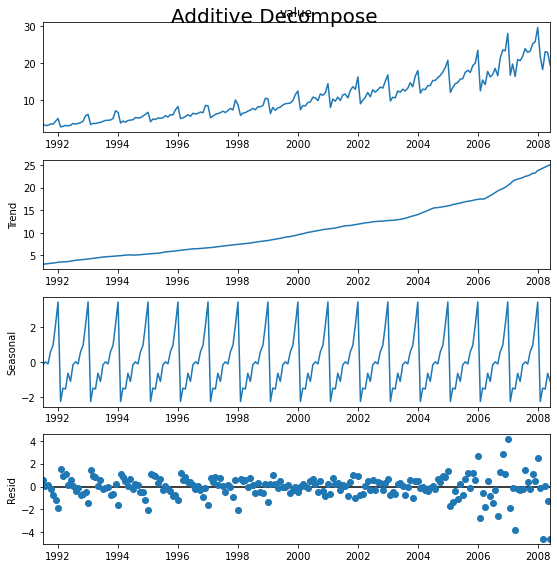

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'],
                                model='multiplicative',
                                extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'],
                                model='additive',
                                extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,8)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)
plt.show()

In this case, Multiplicative better than Additive. Because the residual part of Additive Decompose still left some pattern.

In [55]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [56]:
0.987845 * 3.060085 * 1.166629

3.5265907491183826

## 3. Stationary and Non-Stationary
> Stationary: mean, variance and autocorrelation are constant over time.

Non-stationary -> stationary
1. Integrated: difference the series
2. log transformation
3. nth root of the series

### 3.1. ACF and PACF graph

In [57]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

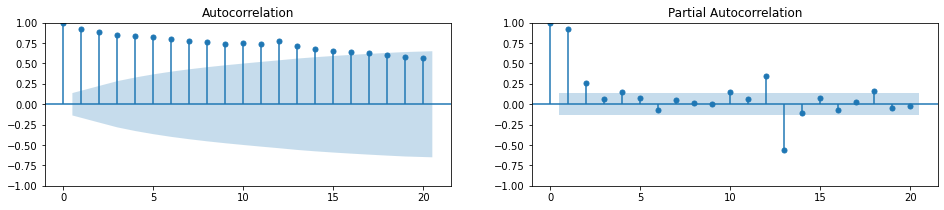

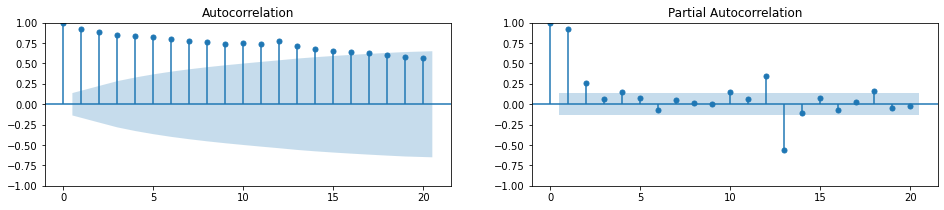

In [71]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(df.value, lags=20, ax=axes[0])
plot_pacf(df.value, lags=20, ax=axes[1], method='ywm')

### 3.2. Unit Root Tests
1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)

In [59]:
from statsmodels.tsa.stattools import adfuller, kpss

In [60]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [61]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067442
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


Therefore, it's non-stationary

In [62]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/peterson/opt/anaconda3/envs/seer/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2011: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## 4. White Noise

In [63]:
import numpy as np

In [64]:
rand_val = np.random.randn(1000)
rand_val.std(), rand_val.mean()

(1.0173770819685766, -0.00461969536127859)

<AxesSubplot:title={'center':'White Noise'}>

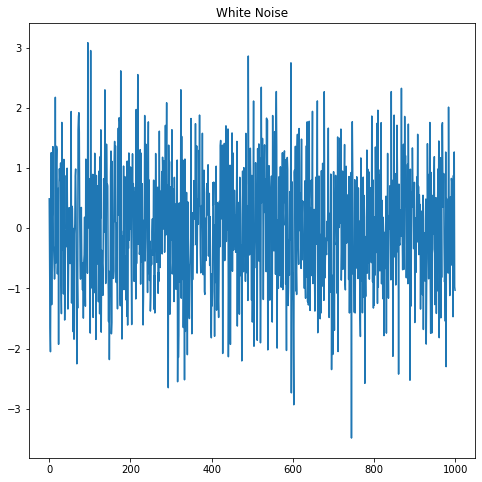

In [65]:
pd.Series(rand_val).plot(title="White Noise")

## 5. Detrend a time series

### 5.1. Substract the line of the best fit

In [66]:
from scipy import signal
df['detrend1'] = signal.detrend(df.value.values)

### 5.2. Substract the trend coponent

In [67]:
df['detrend2'] = df.value.values - result_mul.trend

<AxesSubplot:title={'center':'Detrend Comparison'}, xlabel='date'>

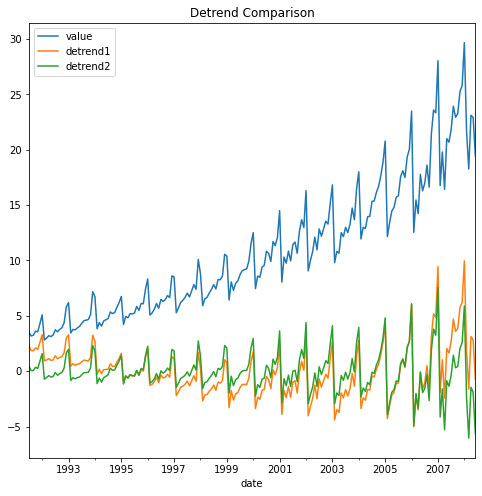

In [68]:
df.plot(title="Detrend Comparison")

It seems the trend component have already been removed.

## 6. Deseasonalise time series

In [69]:
# Deseasonalise
df['deseasonalised'] = df.value.values / result_mul.seasonal

<AxesSubplot:title={'center':'Deseasonalised data'}, xlabel='date'>

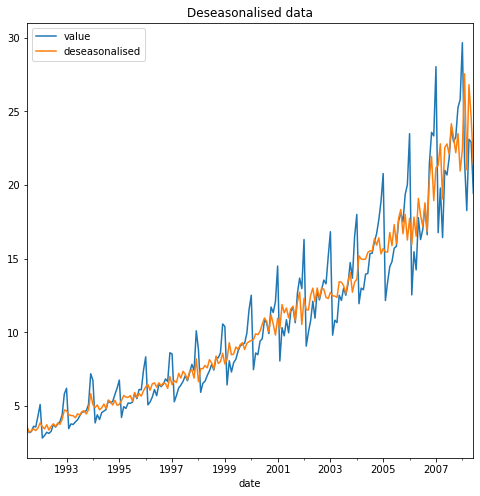

In [70]:
df[['value', 'deseasonalised']].plot(title="Deseasonalised data")

## 7. Time series imputation
As time series has relation with time, therefore we can't use the mean/median of the whole data to do imputation.

* Forward/Backward fill
* Linear/Quadratic interpolation
* Nearest neighbors mean
* Seasonal mean